In [114]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy.stats as st

In [115]:
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

In [116]:
#Step One — read csv files 
mouse_data = pd.read_csv(mouse_metadata_path)
study_data = pd.read_csv(study_results_path)

In [235]:
#Step Two — combine the data into a single data set 
all_data = pd.merge(study_data, mouse_data, how="left", on=["Mouse ID", "Mouse ID"]) 
all_data_1 = all_data
all_data_1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [118]:
#trouble shooting notes
#realized that before merging datasets I first needed to read each csv as a pandas dataframe
#convert data files from Mac Numbers to a csv
#restarted Jupyter Lab once desktop's resources files were update
#updated path names to include .csv
#reran each cell 

In [119]:
#Step Three - display the data as a preview
all_data.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30
1892,b879,45,72.555239,2,Stelasyn,Female,4,26


In [120]:
#Step Four - check the number of mice 
#Unlock - if you want to know the amount of items in an array you can always put the phrase in () and then look at the length of it, like below
len(all_data['Mouse ID'].unique())
#output = 249
#Check the number of mice tested at each timepoint
len(all_data.groupby('Timepoint')['Mouse ID'].unique())
#check all the timepoints
all_data['Timepoint'].unique()
#check mouse IDs at Timepoints 
#all_data['Timepoint'].unique() 
#output = array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])
# all_data[(all_data['Timepoint']==0)] >> 250 rows 
#all_data[(all_data['Timepoint']==5)] >> 238
#all_data[(all_data['Timepoint']==10)] >> 223
#all_data[(all_data['Timepoint']==45)] >> 130
#Discovery, Mouse IDs drop off at each timepoint 
#create a variable for unique mouse IDs
u_mouse_ids = all_data['Mouse ID'].unique()
all_data.drop_duplicates(subset='Mouse ID',keep='first',inplace=True)
all_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [121]:
#Step Five - check number of mice in cleaned up df 
len(all_data['Mouse ID'].unique())
#trouble shooting notes
#at first it didn't seem like 'df.drop_duplicates(subset=['Timepoint'], keep='first')' was doing anythig
#adding 'inplace=True' was the trick. That dropped the Mouse ID from 1893 to 10

249

In [122]:
#Getting the duplicate mouse by ID number that shows up for Mouse ID & Timepoint 
duplicate_mouse = all_data.loc[all_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID']
len(duplicate_mouse) 

0

In [123]:
#Step Six - summary statistics 
#crete your variables 
t_mean = all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
t_median = all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
t_variance = all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
t_std = all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
t_sem = all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#create summary table

In [124]:
#Step Six — Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


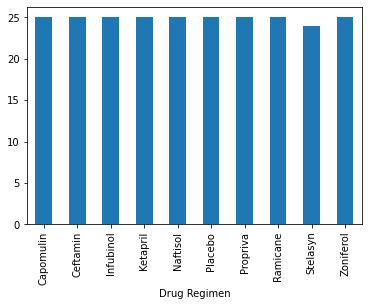

In [125]:
#Step 7 - Create a bar plot using pandas
#create the variables you need 
mice = all_data.groupby('Drug Regimen')['Mouse ID'].count()
pd.Series(mice).plot(kind="bar")

In [126]:
#Step 8 - Create a bar plot with matplotlib
#Create an array of all bars you want to display 
drugs = all_data['Drug Regimen'].unique()
drugs

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [127]:
mice = all_data.groupby('Drug Regimen')['Mouse ID'].count()
mice

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [128]:
#Create the length of the x-axis
#This says that I want to to take my bars array determine the length of items and then arrange this count range
x_axis = np.arange(len(drugs))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<BarContainer object of 10 artists>

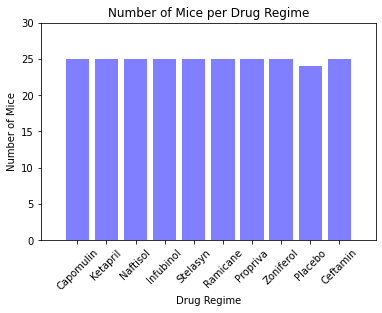

In [129]:
#Plot your bar chart reflecting the amount of mice per drug
#create graph labels for the title, x-axis and y-axis
plt.title("Number of Mice per Drug Regime")
plt.xlabel("Drug Regime")
plt.ylabel("Number of Mice")
#create an array that spaces out the placement of each bar along the x-axis
x_axis = np.arange(len(drugs))
#set the x-axis limits 
plt.xlim(-1.25, len(x_axis)+0.25)
#create labels for each bar along the x-axis using labled tick marks
tick_location = [value for value in x_axis]
plt.xticks(tick_location, ["Capomulin", "Ketapril", "Naftisol", "Infubinol", "Stelasyn","Ramicane", "Propriva", "Zoniferol", "Placebo", "Ceftamin"])
#make lables readable by rotating them
plt.xticks(rotation=45)
#set your y-axis limits 
plt.ylim(0, max(mice)+5)
#finally, graph the final outcome
plt.bar(x_axis, mice, color='b',alpha=.5,align='center')

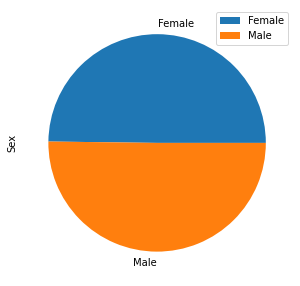

In [130]:
#Step 9 = Create a pie chart of m/f using pandas
percents = all_data.groupby('Sex')['Mouse ID'].count()
df = pd.DataFrame({'Sex': percents})
plot = df.plot.pie(y='Sex', figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x7ff2ce8c8a60>,
 [Text(-0.7771287477781478, -0.9143691319028482, 'Male'),
  Text(0.7123680187966356, 0.8381717042442774, 'Female')],
 [Text(-0.45332510287058614, -0.5333819936099948, '49.8%'),
  Text(0.3885643738890739, 0.457184565951424, '50.2%')])

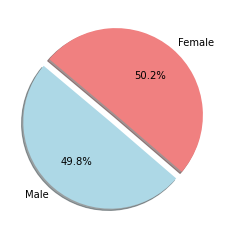

In [131]:
#Step 9 = Create a pie chart showing the breakout of female and male mice in plt 
labels = ["Male","Female"]
size = all_data.groupby('Sex')['Mouse ID'].count()
colors = ["lightblue", "lightcoral"]
explode = (0.1,0,)
plt.pie(size, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [170]:
#Step 10 - Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
all_data_1['Timepoint'].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [175]:
#Create a df of just the necessary info
df_1 = all_data_1[['Mouse ID', 'Timepoint','Tumor Volume (mm3)','Drug Regimen']]
selected = df_1.loc[:,'Drug Regimen']== "Capomulin", "Ramicane", "Infubinol","Ceftamin"
df_1['Timepoint'].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [134]:
#how do I display the dataframe above but only include rows where selected is equal to True? 

In [176]:
conditionals = [(df_1['Drug Regimen']=='Capomulin'),(df_1['Drug Regimen']=='Ramicane'), (df_1['Drug Regimen']=='Infubinol'),(df_1['Drug Regimen']=='Ceftamin')]

In [177]:
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df_1['Selected'] = np.select(conditionals, drug_list)
df_1['Timepoint'].unique()
df_2 = df_1[df_1['Selected']!='0']
df_2['Timepoint'].unique()
df_select_4 = df_2.drop(columns=['Selected'])
df_select_4

<ipython-input-177-e0dff41b4d9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Selected'] = np.select(conditionals, drug_list)


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,b128,0,45.000000,Capomulin
29,c326,0,45.000000,Infubinol
30,c139,0,45.000000,Infubinol
31,v339,0,45.000000,Infubinol
32,a577,0,45.000000,Infubinol
...,...,...,...,...
1879,a644,45,32.978522,Ramicane
1885,i177,45,33.562402,Ramicane
1888,r944,45,41.581521,Capomulin
1889,u364,45,31.023923,Capomulin


In [178]:
# Start by getting the last (greatest) timepoint for each mouse
max_mouse_timepoint = df_select_4.groupby('Mouse ID')['Timepoint'].max()
max_mouse_timepoint

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

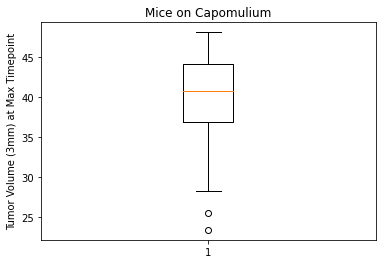

In [179]:
#Calculations for Copmulium 
# Example outlier plot of reaction times
Capomulin_df = df_select_4[df_select_4['Drug Regimen']=='Capomulin']
cap_max_tumor_vol = Capomulin_df['Tumor Volume (mm3)'].unique()
cap_max_tumor_vol

#Create a scatterplot
fig1, ax1 = plt.subplots()
ax1.set_title('Mice on Capomulium')
ax1.set_ylabel('Tumor Volume (3mm) at Max Timepoint')
ax1.boxplot(cap_max_tumor_vol)
plt.show()

In [180]:
Capomulin_df
#Create a new Capomulin specific dataset that only includes data when Timepoint = 45
#First create a string of True/False that prints true when the Timepoint is 45
max_time_tf = (Capomulin_df['Timepoint']==45), True, False
#Then create a new dataframe by setting the newly named dataframe to the old dataframe where Timepoint is equal to 45
Capomulin_df_max_time = Capomulin_df[Capomulin_df['Timepoint']==45]
#print the new dataframe to check the result
Capomulin_df_max_time

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
1764,b128,45,38.982878,Capomulin
1769,t565,45,34.455298,Capomulin
1771,l509,45,41.483008,Capomulin
1777,g288,45,37.074024,Capomulin
1788,r554,45,32.377357,Capomulin
1791,g316,45,40.159220,Capomulin
1797,y793,45,31.896238,Capomulin
1800,m957,45,33.329098,Capomulin
1817,l897,45,38.846876,Capomulin
1821,v923,45,40.658124,Capomulin


In [181]:
#caclulate the quantiles
#first rename the volume column so you can use it in dot notation
Capomulin_df_max_time = Capomulin_df_max_time.rename(columns={'Tumor Volume (mm3)':'volume'})

In [182]:
#calculate quantiles using df.column_name.quantile([0.25,0.50,0.75])
Capomulin_df_max_time
Capomulin_df_max_time.volume.quantile([0.25,0.5,0.75])

0.25    32.377357
0.50    37.311846
0.75    40.159220
Name: volume, dtype: float64

In [183]:
#create a variable for each Capomulin output (continued)
capomulin_quantiles = Capomulin_df_max_time.volume.quantile([0.25,0.5,0.75])
for q in capomulin_quantiles:
    print(q)

32.37735684
37.31184577
40.1592203


In [143]:
#create a variable for each Capomulin output (continued)
lower_quartile = 32.37735684
upper_quartile = 40.1592203
iqr = upper_quartile - lower_quartile
#For median, take the 11th value of the mode
#Capomulin_df_max_time['volume'].mode()
median = 38.125164
lower_outliers = lower_quartile - (1.5*iqr)
uper_outliers = upper_quartile + (1.5*iqr)
#reference code 
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)

In [144]:
#print statements for Capomulin outputs
print(f"Lower Quartile: {lower_quartile}")
print(f"Upper Quartile: {upper_quartile}")
print(f"Interquartile Range: {iqr}")
print(f"The median of tumor volume is: {median}")
print(f"Values below {lower_outliers} could be outliers.")
print(f"Values above {uper_outliers} could be outliers.")

Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Interquartile Range: 7.781863460000004
The median of tumor volume is: 38.125164
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [184]:
#Create a line plot 
#choose a Mouse ID and find its Tumor Volume at each timepoint
Capomulin_df_line = Capomulin_df[(Capomulin_df['Mouse ID']=='u364')]
Capomulin_df_line

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
234,u364,0,45.000000,Capomulin
324,u364,5,45.760886,Capomulin
513,u364,10,46.568417,Capomulin
862,u364,15,47.212200,Capomulin
918,u364,20,40.343948,Capomulin
1206,u364,25,35.503616,Capomulin
1310,u364,30,35.978334,Capomulin
1565,u364,35,35.459490,Capomulin
1704,u364,40,36.024138,Capomulin
1889,u364,45,31.023923,Capomulin


In [185]:
#Create a line plot 
#set a variable for the x-axis, time
time = Capomulin_df_line['Timepoint'].unique()
#set a variable for the y-axis, tumor volume
u364_v = Capomulin_df_line['Tumor Volume (mm3)'].unique()

Text(0, 0.5, 'Tumor Volume (3mm)')

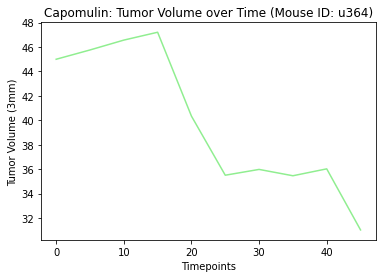

In [186]:
#Plot the line & labels
u364_tumorvol_over_time, = plt.plot(time, u364_v, color="lightgreen", label="Mouse ID: u364")
plt.title("Capomulin: Tumor Volume over Time (Mouse ID: u364)")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (3mm)")

In [187]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,b128,0,45.000000,Capomulin
226,j246,0,45.000000,Capomulin
227,r554,0,45.000000,Capomulin
228,s185,0,45.000000,Capomulin
229,b742,0,45.000000,Capomulin
...,...,...,...,...
1854,s710,45,40.728578,Capomulin
1859,j119,45,38.125164,Capomulin
1878,i557,45,47.685963,Capomulin
1888,r944,45,41.581521,Capomulin


In [149]:
#Start with scatterplot reference code 
#create an x array and y array of the same length 
#x = [mouse weight array]
#y = [average mouse tumor volume array]
#x = numpy.random.normal(5.0, 1.0, 1000)
#y = numpy.random.normal(10.0, 2.0, 1000)
#plt.scatter(x,y)
#plt.show()

In [254]:
#create your x array, for mouse weight 
all_data_1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [239]:
#create a list of mouse weights for mice taking Capomulin
########### breaking this task down:
#first you need the wieight of all mice that were used for the Capomulin Drug Regime
#since you Capomulin_df doesn't include a column for Weight you're going to need to pull from your all_data_1 dataframe
#to find mice wieghts for all mice used in a specific drug regimen, create a key that locates where 'Capmulin' is the row value in the 'Drug Regimen' column. At this row location, pull a list of all mice wieights
all_data_2 = all_data_1['Mouse ID'].drop_duplicates()
cap_weight = all_data_1[(all_data_1['Drug Regimen']=='Capomulin')]['Weight (g)']


In [258]:
#all_data_1['Weight (g)'].min() #15
#all_data_1['Weight (g)'].max() #30

In [259]:
#turn this cap_weight dictonary into a list 
#to do so, first define your variable as a list 
#then create a for loop that iterates through your dictonary above and adds w (the weight (g)) to your new list
x_axis = []
for w in cap_weight:
    x_axis.append(w)
x_axis

[22,
 21,
 17,
 17,
 21,
 15,
 21,
 23,
 25,
 17,
 23,
 21,
 21,
 20,
 25,
 17,
 22,
 19,
 19,
 23,
 17,
 24,
 19,
 17,
 17,
 21,
 19,
 23,
 23,
 21,
 17,
 17,
 21,
 21,
 17,
 15,
 23,
 24,
 17,
 22,
 25,
 25,
 17,
 17,
 20,
 21,
 17,
 22,
 19,
 19,
 17,
 17,
 21,
 19,
 23,
 21,
 20,
 19,
 23,
 24,
 22,
 17,
 17,
 17,
 19,
 25,
 21,
 23,
 17,
 17,
 22,
 21,
 15,
 21,
 25,
 17,
 22,
 19,
 20,
 19,
 25,
 17,
 17,
 21,
 25,
 22,
 17,
 23,
 21,
 15,
 24,
 17,
 19,
 17,
 21,
 23,
 21,
 17,
 21,
 17,
 17,
 22,
 21,
 17,
 19,
 17,
 21,
 21,
 19,
 25,
 23,
 22,
 21,
 21,
 17,
 17,
 24,
 19,
 20,
 17,
 23,
 15,
 25,
 23,
 23,
 17,
 21,
 24,
 15,
 19,
 21,
 17,
 17,
 17,
 21,
 21,
 17,
 19,
 22,
 22,
 19,
 21,
 20,
 17,
 21,
 21,
 24,
 17,
 22,
 17,
 21,
 21,
 17,
 15,
 17,
 19,
 19,
 22,
 19,
 25,
 21,
 17,
 23,
 23,
 20,
 17,
 19,
 17,
 21,
 21,
 21,
 20,
 17,
 15,
 17,
 17,
 19,
 22,
 25,
 22,
 17,
 17,
 24,
 23,
 23,
 19,
 21,
 21,
 22,
 25,
 17,
 17,
 17,
 23,
 23,
 21,
 21,
 17,
 19,
 17,


In [221]:
Capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,b128,0,45.0,Capomulin
226,j246,0,45.0,Capomulin
227,r554,0,45.0,Capomulin
228,s185,0,45.0,Capomulin
229,b742,0,45.0,Capomulin


In [267]:
#create a list of average tumor volume
#to do this do a groupby mouse ID and then take the average of tumor volume 
#avg_tumor = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)']
vol = Capomulin_df['Tumor Volume (mm3)']
y_axis = []
for v in vol: 
    y_axis.append(v)
y_axis

[45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.85119285,
 45.46224327,
 39.20212894,
 43.180977399999996,
 45.89372032,
 41.40859145,
 45.76088647,
 41.53409702,
 45.70443431,
 38.79647373,
 45.47375302,
 45.83899787,
 42.2616653,
 41.01991315,
 44.02275246,
 45.59706359,
 45.73714484,
 45.78174579,
 43.87849569,
 45.59568527,
 45.64143788,
 45.8956472,
 45.65133131,
 45.83939976,
 45.62238149,
 39.0054935,
 46.56841719,
 39.84822328,
 46.30400254,
 43.68802627,
 46.75907363,
 43.42101414,
 46.414517700000005,
 46.42536551,
 42.99207658,
 44.50204246,
 41.63001026,
 35.6244027,
 36.82536664,
 46.15473721,
 46.54429202,
 43.23196275,
 39.95234669,
 46.74900552,
 37.61494768,
 43.2708519,
 41.99922813,
 39.11389068,
 46.408361299999996,
 46.05960827,
 38.17723195,
 43.78489343,
 42.17230079,
 37.97877782,
 39.80445341,
 47.37342325,
 42.28366512,
 44.4409486

(20.34359787, 51.15820939)

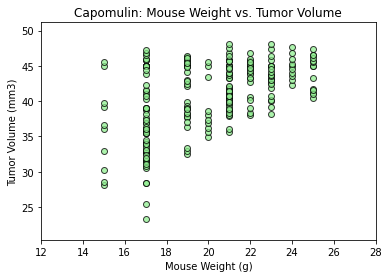

In [265]:
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightgreen", edgecolors="black",
            s=cap_weight_2, alpha=0.75)
plt.title("Capomulin: Mouse Weight vs. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Set x and y limits
plt.xlim(min(x_axis)-3, max(x_axis)+3)
plt.ylim(min(y_axis)-3, max(y_axis)+3)